In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem


l_1 = 7                               # m length of the room 1 
l_2 = 6                               # m length of the room 2
b = 2.5                               # m height of the room 1 and 2
w = 6                                 # m width of the rooms
S_door = 1.9                          # m² surface of inside and outside door 
Sg = 2.8                              # m² surface of the glass 
S_wall_out_1 = l_1*b - Sg - S_door    # m² surface of concrete & insulation of the outside wall room 1
S_wall_out_2 = l_2*b - Sg             # m² surface of concrete & insulation of the outside wall room 2
S_wall_in = w*b - S_door              # m² surface of insulation of the inside wall 




air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/(kg·K)
pd.DataFrame.from_dict(air, orient='index', columns=['air'])
pd.DataFrame(air, index=['Air'])

concrete_wallout_1 = {'Conductivity': 1.400,
            'Density': 2300.0,
            'Specific heat': 880,
            'Width': 0.35,
            'Surface': S_wall_out_1}

concrete_wallout_2 = {'Conductivity': 1.400,
            'Density': 2300.0,
            'Specific heat': 880,
            'Width': 0.35,
            'Surface': S_wall_out_2}

concrete_in = {'Conductivity': 1.400,
            'Density': 2300.0,
            'Specific heat': 880,
            'Width': 0.2,
            'Surface': S_wall_in}

insulation_wallout_1 = {'Conductivity': 0.027,
              'Density': 55.0,
              'Specific heat': 1210,
              'Width': 0.2,
              'Surface': S_wall_out_1}

insulation_wallout_2 = {'Conductivity': 0.027,
              'Density': 55.0,
              'Specific heat': 1210,
              'Width': 0.2,
              'Surface': S_wall_out_2}

insulation_in = {'Conductivity': 0.027,
              'Density': 55.0,
              'Specific heat': 1210,
              'Width': 0.1,
              'Surface': S_wall_in}

glass = {'Conductivity': 1.4,
         'Density': 2500,
         'Specific heat': 1210,
         'Width': 0.04,
         'Surface': Sg}

door = {'Conductivity': 0.2,
         'Density': 500,
         'Specific heat': 1250,
         'Width': 0.1,
         'Surface': S_door}

wall_out_1 = pd.DataFrame.from_dict({'Layer_out': concrete_wallout_1,
                               'Layer_in': insulation_wallout_1,
                               'Door': door,
                               'Glass': glass},
                              orient='index')

wall_out_2 = pd.DataFrame.from_dict({'Layer_out': concrete_wallout_2,
                               'Layer_in': insulation_wallout_2,
                               'Glass': glass},
                              orient='index')

wall_in = pd.DataFrame.from_dict({'Layer_out': concrete_in,
                               'Layer_in': insulation_in,
                               'Door': door},
                              orient='index')

# radiative properties
ε_wLW = 0.85        # long wave emmisivity: wall surface (concrete)
ε_gLW = 0.90        # long wave emmisivity: glass pyrex
ε_wood_SW = 0.85    # short wave emmisivity: wood
α_wSW = 0.25        # short wave absortivity: white smooth surface
α_gSW = 0.38        # short wave absortivity: reflective blue glass
τ_gSW = 0.30        # short wave transmitance: reflective blue glass


σ = 5.67e-8     # W/(m²⋅K⁴) Stefan-Bolzmann constant

# convection 
h = pd.DataFrame([{'in': 8., 'out': 25}], index=['h'])  # W/(m²⋅K)



In [2]:
#conduction wall outs
G_cd_out_1 = pd.DataFrame({'Conductance': [wall_out_1.loc['Layer_in']['Conductivity'] / wall_out_1.loc['Layer_in']['Width'] * wall_out_1.loc['Layer_in']['Surface'],
                                           wall_out_1.loc['Layer_out']['Conductivity'] / wall_out_1.loc['Layer_out']['Width'] * wall_out_1.loc['Layer_out']['Surface']]})

G_cd_out_2 = pd.DataFrame({'Conductance': [wall_out_2.loc['Layer_in']['Conductivity'] / wall_out_2.loc['Layer_in']['Width'] * wall_out_2.loc['Layer_in']['Surface'],
                                           wall_out_2.loc['Layer_out']['Conductivity'] / wall_out_2.loc['Layer_out']['Width'] * wall_out_2.loc['Layer_out']['Surface']]})



In [3]:
#Conduction wall in
G_cd_in = pd.DataFrame({'Conductance': [wall_in.loc['Layer_in']['Conductivity'] / wall_in.loc['Layer_in']['Width'] * wall_in.loc['Layer_in']['Surface'],
                                           wall_in.loc['Layer_out']['Conductivity'] / wall_in.loc['Layer_out']['Width'] * wall_in.loc['Layer_out']['Surface']]})


In [4]:
#Convections
Gco_out_1= h.loc['h', 'out'] * wall_out_1['Surface'][0]       # concrete wall out 1
Gci_out_1= h.loc['h', 'in'] * wall_out_1['Surface'][0]       # insulation wall out 1
Ggi_out_1 = h.loc['h', 'in'] * wall_out_1['Surface'][3]      # inside glass out 1
Ggo_out_1 = h.loc['h', 'out'] * wall_out_1['Surface'][3]      # outside glass out 1


Gco_out_2 = h.loc['h', 'out'] * wall_out_2['Surface'][0]     # concrete wall out 2
Gci_out_2 = h.loc['h', 'in'] * wall_out_2['Surface'][0]     # insulation wall out 2
Ggi_out_2 = h.loc['h', 'in'] * wall_out_2['Surface'][2]     # inside glass out 2
Ggo_out_2 = h.loc['h', 'out'] * wall_out_2['Surface'][2]     # outside glass out 2


Gc_in = h.loc['h', 'in'] * wall_in['Surface'][0]           # wall in




In [5]:
# ventilation flow rate
Va = l_1*b*w                  # m³, volume of air
ACH = 1                     # air changes per hour
Va_dot = ACH / 3600 * Va    # m³/s, air infiltration


In [6]:
# ventilation & advection
Gv = air['Density'] * air['Specific heat'] * Va_dot

In [7]:
# P-controler gain for room 1 and 2
Kp = 1e4            # almost perfect controller Kp -> ∞
Kp = 1e-3           # no controller Kp -> 0
Kp = 0


In [8]:
#Thermal Capacities 

C = pd.DataFrame({'Capacity': [wall_out_1.loc['Layer_in']['Density'] * wall_out_1.loc['Layer_in']['Specific heat'] * wall_out_1.loc['Layer_in']['Surface'] * wall_out_1.loc['Layer_in']['Width'],
                              wall_out_1.loc['Layer_out']['Density'] * wall_out_1.loc['Layer_out']['Specific heat'] * wall_out_1.loc['Layer_out']['Surface'] * wall_out_1.loc['Layer_out']['Width'],
                              wall_out_2.loc['Layer_in']['Density'] * wall_out_2.loc['Layer_in']['Specific heat'] * wall_out_2.loc['Layer_in']['Surface'] * wall_out_2.loc['Layer_in']['Width'],
                              wall_out_2.loc['Layer_out']['Density'] * wall_out_2.loc['Layer_out']['Specific heat'] * wall_out_2.loc['Layer_out']['Surface'] * wall_out_2.loc['Layer_out']['Width'],
                              wall_in.loc['Layer_in']['Density'] * wall_in.loc['Layer_in']['Specific heat'] * wall_in.loc['Layer_in']['Surface'] * wall_in.loc['Layer_in']['Width'],
                              wall_in.loc['Layer_out']['Density'] * wall_in.loc['Layer_out']['Specific heat'] * wall_in.loc['Layer_out']['Surface'] * wall_in.loc['Layer_out']['Width'],
                              air['Density'] * air['Specific heat'] * Va]})



In [9]:
#A- Incidence Matrix

A = np.zeros([24, 16])       
A[1, 5] = 1
A[2, 0] = 1   
A[3, 0], A[3, 1]=-1,1 
A[4, 1], A[4, 2]=-1,1 
A[5, 2], A[5, 3]=-1,1 
A[6, 3], A[6, 5]=-1,1 
A[7, 4]=1
A[8, 4], A[8, 5]=-1,1 
A[9, 10]=1
A[10, 10]=1
A[11, 14]=1 
A[12, 13], A[12, 14]= 1,-1 
A[13, 12], A[13, 13]= 1,-1
A[14, 11], A[14, 12]= 1,-1 
A[15, 10], A[15, 11]= 1,-1 
A[16, 15]=1
A[17, 10],A[17, 15]= 1,-1
A[18, 9], A[18, 10]= -1,1 
A[19, 8], A[19, 9]= -1,1 
A[20, 7], A[20, 8]= -1,1
A[21, 6], A[21, 7]= -1,1 
A[22, 5], A[22, 6]= -1,1 
A[23, 5], A[23, 10]= 1,-1 

# np.set_printoptions(suppress=False)
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#G- Conductance Matrix

G= np.zeros([24, 24]) 
G[0,0]= Gv
G[1,1]=G[10,10]= Kp
G[2,2]= Gco_out_1
G[3,3]= G_cd_out_1['Conductance'][1]
G[4,4]= (1/G_cd_out_1['Conductance'][0])+(1/G_cd_out_1['Conductance'][1])
G[5,5]= G_cd_out_1['Conductance'][0]
G[6,6]= Gci_out_1
G[7,7]= Ggo_out_1
G[8,8]= Ggi_out_1
G[9,9]= Gv
G[11,11]= Gco_out_2
G[12,12]= G_cd_out_2['Conductance'][1]
G[13,13]= (1/G_cd_out_2['Conductance'][0])+(1/G_cd_out_2['Conductance'][1])
G[14,14]= G_cd_out_2['Conductance'][0]
G[15,15]= Gci_out_2
G[16,16]= Ggo_out_2
G[17,17]= Ggi_out_2
G[18,18]= Gc_in
G[19,19]= G_cd_in['Conductance'][0]
G[20,20]=(1/G_cd_in['Conductance'][0])+(1/G_cd_in['Conductance'][1])
G[21,21]= G_cd_in['Conductance'][1]
G[22,22]= Gc_in
G[23,23]= Gv

pd.DataFrame(G)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,35.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0
2,0.0,0.0,320.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,51.2,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.598235,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,1.728,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000,102.4,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,70.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,22.4,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,35.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0


In [11]:
# C matrix_Capacity-matrix
Cmat=np.zeros([16,16])

Cmat[1,1]= C['Capacity'][0]
Cmat[2,2]= C['Capacity'][1]
Cmat[7,7]= C['Capacity'][4]
Cmat[8,8]= C['Capacity'][5]
Cmat[12,12]= C['Capacity'][2]
Cmat[13,13]= C['Capacity'][3]


#print('Cmat=',Cmat)

# pd.set_option("display.precision", 3)
pd.DataFrame(Cmat)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,170368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,9067520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87180.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5302880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# b matrix_temperature source vector

b = np.zeros(24)        # branches
b[[0, 1, 2, 7, 9, 10, 11, 16]] = 1   # branches with temperature sources

print(f'b = ', b)

b =  [1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
# f matrix_heat flow source vector

f = np.zeros(16)         # nodes
f[[0, 3, 4, 6, 9, 11, 14, 15]] = 1     # nodes with heat-flow sources
print(f'f = ', f)

f =  [1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.]


In [14]:
# y_output vector

y = np.zeros(16)         # nodes
y[[3, 6]] = 1              # nodes (temperatures) of interest
print(f'y = ', y)

y =  [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
np.shape(A)

(24, 16)

In [18]:
np.shape(C)

(7, 1)

In [19]:
C = Cmat

In [20]:
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)
print('As = \n', As, '\n')
print('Bs = \n', Bs, '\n')
print('Cs = \n', Cs, '\n')
print('Ds = \n', Ds, '\n')

As = 
 [[-2.62585497e-04  3.51142793e-06  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.59755869e-08 -2.49815609e-07  1.02680712e-07  2.73255659e-09
   1.29352747e-09  0.00000000e+00]
 [ 0.00000000e+00  1.06796751e-05 -2.56987963e-04  1.15476419e-05
   3.87201222e-06  0.00000000e+00]
 [ 0.00000000e+00  4.67246318e-09  1.89845744e-07 -6.73019954e-07
   1.30518520e-08  0.00000000e+00]
 [ 0.00000000e+00  7.22314433e-08  2.07882623e-06  4.26232003e-07
  -1.36379706e-05  3.86530739e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.26245643e-08 -4.94032059e-06]] 

Bs = 
 [[0.00000000e+00 0.00000000e+00 2.59074069e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.09606466e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.56282832e-08
  2.79523080e-08 0.00000000e+00 0.00000000e+00 1.35526342e-08
  0.

In [21]:
#Steady State 
b = np.zeros(24)        # temperature sources
b[[0, 2,7,9,11,16]] = 10             # outdoor temperature
b[[1,10]] = 20            # indoor set-point temperature

f = np.zeros(16)         # flow-rate sources

In [22]:
θ = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)     #DAE
print(f'θ = {θ} °C')

θ = [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.] °C


In [28]:
#State Space Representation
bT = np.array([10, 20,10,10,10,20,10,10])     # [To, Tisp, To, To, To, Tisp, To, To]
fQ = np.array([1, 1, 1, 1, 1, 1, 1, 1])      
u = np.hstack([bT, fQ])
print(f'u = {u}')

u = [10 20 10 10 10 20 10 10  1  1  1  1  1  1  1  1]


In [24]:
yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
print(f'yss = {yss} °C')

yss = [10.09097118 10.09106535] °C


In [29]:
#error
print(f'Max error between DAE and state-space: \
{max(abs(θ[6] - yss)):.2e} °C')

Max error between DAE and state-space: 9.11e-02 °C


In [30]:
#Dynamic Simulation
λ = np.linalg.eig(As)[0]    # eigenvalues of matrix As

print('Time constants: \n', -1 / λ, 's \n')
print('2 x Time constants: \n', -2 / λ, 's \n')
dtmax = 2 * min(-1. / λ)
print(f'Maximum time step: {dtmax:.2f} s = {dtmax / 60:.2f} min')

Time constants: 
 [3.80827062e+03 3.89053824e+03 7.33253146e+04 4.09164523e+06
 1.50590578e+06 2.03746718e+05] s 

2 x Time constants: 
 [7.61654124e+03 7.78107648e+03 1.46650629e+05 8.18329046e+06
 3.01181156e+06 4.07493437e+05] s 

Maximum time step: 7616.54 s = 126.94 min


In [31]:
# time step
dt = np.floor(dtmax / 60) * 60   # s
print(f'dt = {dt} s = {dt / 60:.0f} min')

dt = 7560.0 s = 126 min


In [32]:
# settling time
time_const = np.array([int(x) for x in sorted(-1 / λ)])
print('4 * Time constants: \n', 4 * time_const, 's \n')

t_settle = 4 * max(-1 / λ)
print(f'Settling time: \
{t_settle:.0f} s = \
{t_settle / 60:.1f} min = \
{t_settle / (3600):.2f} h = \
{t_settle / (3600 * 24):.2f} days')

4 * Time constants: 
 [   15232    15560   293300   814984  6023620 16366580] s 

Settling time: 16366581 s = 272776.3 min = 4546.27 h = 189.43 days


In [33]:
# Step response
# -------------
# Find the next multiple of 3600 s that is larger than t_settle
duration = np.ceil(t_settle / 3600) * 3600
n = int(np.floor(duration / dt))    # number of time steps
t = np.arange(0, n * dt, dt)        # time vector for n time steps

print(f'Duration = {duration} s')
print(f'Number of time steps = {n}')
# pd.DataFrame(t, columns=['time'])

Duration = 16369200.0 s
Number of time steps = 2165


In [46]:
#Input Vector
u = np.zeros([16, n])                
u[0:6, :] = 10 * np.ones([6, n])    # To = 10 for n time steps
u[6:8, :] = 20 * np.ones([2, n])      # Tisp = 20 for n time steps

pd.DataFrame(u)

,0,1,2,3,4,5,6,7,8,9,...,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164
0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
5,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
6,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
7,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Time Integration
n_s = As.shape[0]                      # number of state variables
θ_exp = np.zeros([n_s, t.shape[0]])    # explicit Euler in time t
θ_imp = np.zeros([n_s, t.shape[0]])    # implicit Euler in time t

I = np.eye(n_s)                        # identity matrix

for k in range(n - 1):
    θ_exp[:, k + 1] = (I + dt * As) @\
        θ_exp[:, k] + dt * Bs @ u[:, k]
    θ_imp[:, k + 1] = np.linalg.inv(I - dt * As) @\
        (θ_imp[:, k] + dt * Bs @ u[:, k])

In [65]:
y_exp = Cs @ θ_exp + Ds @  u
y_imp = Cs @ θ_imp + Ds @  u
y_exp

array([[ 4.75865651, 15.82180661,  5.41887863, ..., 11.79969132,
        11.79971457, 11.79973777],
       [ 2.58077805, 18.15762535,  3.49773726, ..., 11.81316209,
        11.8131791 , 11.81319607]])

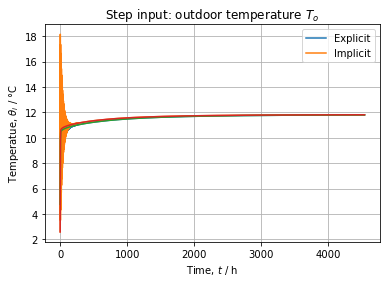

In [50]:
fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp.T, t / 3600, y_imp.T)
ax.set(xlabel='Time, $t$ / h',
       ylabel='Temperatue, $θ_i$ / °C',
       title='Step input: outdoor temperature $T_o$')
ax.legend(['Explicit', 'Implicit'])
ax.grid()
plt.show()

In [67]:
print('Steady-state indoor temperature obtained with:')
print(f'- DAE model: {float(θ[1]):.4f} °C and {float(θ[5]):.4f} °C')
print(f'- state-space model: {float(yss[0]):.4f} °C and {float(yss[1]):.4f} °C')
print(f'- steady-state response to step input: {float(y_exp[:, -2][0]):.4f} °C and {float(y_exp[:, -2][1]):.4f} °C')

Steady-state indoor temperature obtained with:
- DAE model: 10.0000 °C and 10.0000 °C
- state-space model: 10.0910 °C and 10.0911 °C
- steady-state response to step input: 11.7997 °C and 11.8132 °C


In [68]:
#Simulation Weather Data
start_date = '01-03 12:00:00'
end_date = '02-05 18:00:00'

start_date = '2000-' + start_date
end_date = '2000-' + end_date
print(f'{start_date} \tstart date')
print(f'{end_date} \tend date')

2000-01-03 12:00:00 	start date
2000-02-05 18:00:00 	end date


In [70]:
filename = './weather_data/FRA_Lyon.074810_IWEC.epw'
[data, meta] = dm4bem.read_epw(filename, coerce_year=None)
weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
del data

In [71]:
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather.loc[start_date:end_date]

In [72]:
surface_orientation = {'slope': 90,
                       'azimuth': 0,
                       'latitude': 45}
albedo = 0.2
rad_surf = dm4bem.sol_rad_tilt_surf(
    weather, surface_orientation, albedo)
# pd.DataFrame(rad_surf)

In [73]:
rad_surf['Φtot'] = rad_surf.sum(axis=1)

In [74]:
# resample weather data
data = pd.concat([weather['temp_air'], rad_surf['Φtot']], axis=1)
data = data.resample(str(dt) + 'S').interpolate(method='linear')
data = data.rename(columns={'temp_air': 'To'})
# pd.DataFrame(data)

In [76]:
data['Ti'] = 20 * np.ones(data.shape[0])
data['Qa'] = 1 * np.ones(data.shape[0])
# pd.DataFrame(data)